In [275]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
import config.py

ModuleNotFoundError: No module named 'config'

In [182]:
la_lat = 34.052235
la_long = -118.243683
years = list(range(2013, 2019))
months = ['07', '12']
days = list(range(1, 32))

all_dates = []
for year in years:
    for month in months:
        for day in days:
            if day < 10:
                str_day = '0' + str(day)
            else:
                str_day = str(day)
            all_dates.append(str(year) + '-' + month + '-' + str_day + 'T23:59:59')

In [149]:
url = 'https://api.darksky.net/forecast/{}/{},{},{}'.format(api_key, la_lat, la_long, all_dates)

In [ ]:
api_key = config.api_key

In [155]:
repo = requests.get('https://api.darksky.net/forecast/{}/{},{},{}?exclude=currenty,minutely,hourly,flags'.format(api_key, la_lat, la_long, all_dates))
countries = repo.json()

In [165]:
dec = pd.DataFrame(countries)

,latitude,longitude,timezone,currently,daily,offset
apparentTemperature,34.052235,-118.243683,America/Los_Angeles,60.61,NaN,-8
cloudCover,34.052235,-118.243683,America/Los_Angeles,0.2,NaN,-8
data,34.052235,-118.243683,America/Los_Angeles,NaN,"[{'time': 1546243200, 'summary': 'Partly cloud...",-8
dewPoint,34.052235,-118.243683,America/Los_Angeles,39.97,NaN,-8
humidity,34.052235,-118.243683,America/Los_Angeles,0.46,NaN,-8


In [195]:
weather =[]
for date in all_dates:
    repo = requests.get('https://api.darksky.net/forecast/{}/{},{},{}?exclude=currenty,minutely,hourly,flags'.format(api_key, la_lat, la_long, date))
    countries = repo.json()
    countries['daily']['data'][0]['date'] = date
    weather.append(countries['daily']['data'][0])

In [210]:
flights_jul_13 = pd.read_csv('~/Downloads/521675453_T_ONTIME_REPORTING.csv' )

In [212]:
flights_dec_13 = pd.read_csv('flights_dec_2013.csv' )

In [603]:
flights_jul_14 = pd.read_csv('~/Downloads/july_14.csv' )

In [304]:
flights_dec_14 = pd.read_csv('~/Downloads/dec_14.csv')
flights_jul_15 = pd.read_csv('~/Downloads/july_15.csv')
flights_dec_15 = pd.read_csv('~/Downloads/dec_15.csv')
flights_jul_16 = pd.read_csv('~/Downloads/july_16.csv')
flights_dec_16 = pd.read_csv('~/Downloads/dec_16.csv')
flights_jul_17 = pd.read_csv('~/Downloads/july_17.csv')
flights_dec_17 = pd.read_csv('~/Downloads/dec_17.csv')
flights_jul_18 = pd.read_csv('~/Downloads/july_18.csv')
flights_dec_18 = pd.read_csv('~/Downloads/dec_18.csv')

In [608]:
all_flights = pd.concat([flights_jul_13, flights_dec_13, 
                        flights_jul_14, flights_dec_14, 
                        flights_jul_15, flights_dec_15, 
                        flights_jul_16, flights_dec_16, 
                        flights_jul_17, flights_dec_17, 
                        flights_jul_18, flights_dec_18])

/Users/charleneawillis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [610]:
all_flights.columns

Index(['ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'ARR_DELAY', 'ARR_DELAY_GROUP',
       'ARR_TIME', 'ARR_TIME_BLK', 'CANCELLATION_CODE', 'CANCELLED',
       'CARRIER_DELAY', 'CRS_ARR_TIME', 'CRS_DEP_TIME', 'CRS_ELAPSED_TIME',
       'DEP_DELAY', 'DEP_DELAY_GROUP', 'DEP_TIME', 'DEP_TIME_BLK', 'DEST',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',
       'DEST_CITY_NAME', 'DISTANCE', 'DISTANCE_GROUP', 'DIVERTED', 'FLIGHTS',
       'FL_DATE', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY', 'OP_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 'OP_UNIQUE_CARRIER',
       'ORIGIN', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN_CITY_NAME', 'SECURITY_DELAY',
       'TAIL_NUM', 'TAXI_IN', 'TAXI_OUT', 'Unnamed: 44', 'WEATHER_DELAY',
       'WHEELS_OFF', 'WHEELS_ON'],
      dtype='object')

In [618]:
all_flights

,ACTUAL_ELAPSED_TIME,AIR_TIME,ARR_DELAY,ARR_DELAY_GROUP,ARR_TIME,ARR_TIME_BLK,CANCELLATION_CODE,CANCELLED,CARRIER_DELAY,CRS_ARR_TIME,...,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,SECURITY_DELAY,TAIL_NUM,TAXI_IN,TAXI_OUT,Unnamed: 44,WEATHER_DELAY,WHEELS_OFF,WHEELS_ON
0,151.0,125.0,13.0,NaN,945.0,NaN,NaN,0.0,NaN,932,...,NaN,"Los Angeles, CA",NaN,NaN,7.0,19.0,NaN,NaN,633.0,938.0
1,130.0,110.0,31.0,NaN,2247.0,NaN,NaN,0.0,1.0,2216,...,NaN,"Denver, CO",0.0,NaN,8.0,12.0,NaN,0.0,2149.0,2239.0
2,138.0,111.0,-16.0,NaN,1354.0,NaN,NaN,0.0,NaN,1410,...,NaN,"Denver, CO",NaN,NaN,5.0,22.0,NaN,NaN,1258.0,1349.0
3,141.0,118.0,3.0,NaN,1803.0,NaN,NaN,0.0,NaN,1800,...,NaN,"Fresno, CA",NaN,NaN,8.0,15.0,NaN,NaN,1457.0,1755.0
4,131.0,112.0,-3.0,NaN,1810.0,NaN,NaN,0.0,NaN,1813,...,NaN,"Denver, CO",NaN,NaN,5.0,14.0,NaN,NaN,1713.0,1805.0
5,137.0,119.0,6.0,NaN,2210.0,NaN,NaN,0.0,NaN,2204,...,NaN,"Santa Ana, CA",NaN,NaN,6.0,12.0,NaN,NaN,1905.0,2204.0
6,141.0,124.0,-15.0,NaN,1807.0,NaN,NaN,0.0,NaN,1822,...,NaN,"Denver, CO",NaN,NaN,7.0,10.0,NaN,NaN,1656.0,1800.0
7,141.0,122.0,-7.0,NaN,2216.0,NaN,NaN,0.0,NaN,2223,...,NaN,"San Francisco, CA",NaN,NaN,6.0,13.0,NaN,NaN,1908.0,2210.0
8,128.0,110.0,-3.0,NaN,1412.0,NaN,NaN,0.0,NaN,1415,...,NaN,"Denver, CO",NaN,NaN,6.0,12.0,NaN,NaN,1316.0,1406.0
9,141.0,123.0,-1.0,NaN,1811.0,NaN,NaN,0.0,NaN,1812,...,NaN,"Los Angeles, CA",NaN,NaN,5.0,13.0,NaN,NaN,1503.0,1806.0


In [620]:
flight = all_flights.drop(columns=['OP_CARRIER', 'TAIL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', "DEP_DELAY_GROUP", "DEP_TIME_BLK", "ARR_DELAY_GROUP", "ARR_TIME_BLK", "FLIGHTS",'DISTANCE', 'DISTANCE_GROUP'])

KeyError: "['OP_CARRIER' 'TAIL_NUM' 'ORIGIN_AIRPORT_ID' 'ORIGIN_AIRPORT_SEQ_ID'\n 'ORIGIN_CITY_MARKET_ID' 'DEST_AIRPORT_ID' 'DEST_AIRPORT_SEQ_ID'\n 'DEST_CITY_MARKET_ID' 'DEP_DELAY_GROUP' 'DEP_TIME_BLK' 'ARR_DELAY_GROUP'\n 'ARR_TIME_BLK' 'FLIGHTS' 'DISTANCE' 'DISTANCE_GROUP'] not found in axis"

In [621]:
flight = all_flights

In [617]:
flight = []
for x in all_flights:
    flight.append(x.drop(columns=['OP_CARRIER', 'TAIL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', "DEP_DELAY_GROUP", "DEP_TIME_BLK", "ARR_DELAY_GROUP", "ARR_TIME_BLK", "FLIGHTS",'DISTANCE', 'DISTANCE_GROUP']))

AttributeError: 'str' object has no attribute 'drop'

In [307]:
flights_dec_13.columns

Index(['FL_DATE', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER',
       'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Unnamed: 44'],
      dtype='object')

In [605]:
flight = pd.concat(flights)

In [622]:
flight = flight[(flight['ORIGIN_CITY_NAME'] == 'Los Angeles, CA') &
                                     ((flight['DEST_CITY_NAME'] == 'New York, NY') |
                                     (flight['DEST_CITY_NAME'] == 'Miami, FL'))]

In [326]:
flight = flight.drop(columns=['OP_CARRIER', 'TAIL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', "DEP_DELAY_GROUP", "DEP_TIME_BLK", "ARR_DELAY_GROUP", "ARR_TIME_BLK", "FLIGHTS",'DISTANCE', 'DISTANCE_GROUP'])

In [624]:
df = df.replace({np.nan : None})
flight = flight.replace({np.nan : None})

In [375]:
df.head()

,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,cloudCover,date,...,temperatureMin,temperatureMinTime,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed
0,95.53,1372721820,67.86,1372769760,95.53,1372721820,68.9,1372682580,0.14,2013-07-01T23:59:59,...,68.18,1372682700,1372662000,10,1372709160,9.731,196,10.36,1372725600,2.93
1,86.22,1372791600,66.31,1372856040,86.22,1372791600,67.86,1372769760,0.25,2013-07-02T23:59:59,...,67.18,1372769760,1372748400,10,1372791960,8.973,213,12.53,1372795380,2.94
2,85.13,1372881600,65.17,1372940820,85.13,1372881600,66.31,1372856040,0.49,2013-07-03T23:59:59,...,65.6,1372856100,1372834800,10,1372878720,9.187,235,10.97,1372893000,3.1
3,86.99,1372974960,64.8,1373025120,86.99,1372974960,65.17,1372940820,0.4,2013-07-04T23:59:59,...,64.54,1372940760,1372921200,11,1372967880,8.463,220,11.67,1372982100,3.23
4,82.94,1373068080,65.85,1373110980,82.94,1373068080,64.8,1373025120,0.54,2013-07-05T23:59:59,...,64.19,1373025300,1373007600,10,1373056680,7.78,214,11.09,1373057640,2.87


In [382]:
df = df.assign(city='Los Angeles, CA')

In [383]:
la_weather_subset = df[['date', 'city', 
                                      'temperatureHigh', 'temperatureLow', 
                                      'cloudCover', 'dewPoint', 'humidity', 
                                      'precipIntensity', 'precipProbability', 
                                      'precipType', 'pressure', 'uvIndex', 
                                      'visibility', 'windBearing', 
                                      'windGust', 'windSpeed']]

In [396]:
la_weather_subset['date'] = [x[:10] for x in la_weather_subset['date']]

/Users/charleneawillis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [398]:
la_weather_subset

,date,city,temperatureHigh,temperatureLow,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,precipType,pressure,uvIndex,visibility,windBearing,windGust,windSpeed
0,2013-07-01,"Los Angeles, CA",96.03,67.18,0.14,61.9,0.59,0,0,None,1010.5,10,9.731,196,10.36,2.93
1,2013-07-02,"Los Angeles, CA",85.97,65.6,0.25,62.34,0.65,0,0,None,1013.4,10,8.973,213,12.53,2.94
2,2013-07-03,"Los Angeles, CA",85.03,64.54,0.49,61.38,0.66,0,0,None,1011.5,10,9.187,235,10.97,3.1
3,2013-07-04,"Los Angeles, CA",87.5,64.19,0.4,60.29,0.65,0,0,None,1009.3,11,8.463,220,11.67,3.23
4,2013-07-05,"Los Angeles, CA",82.93,65.18,0.54,60.58,0.69,0,0,None,1009.4,10,7.78,214,11.09,2.87
5,2013-07-06,"Los Angeles, CA",84.48,64.94,0.58,61.47,0.69,0,0,None,1008.9,11,9.36,221,12.45,3.35
6,2013-07-07,"Los Angeles, CA",84.31,62.76,0.49,61.38,0.68,0,0,None,1009.4,11,8.625,241,12.2,3.22
7,2013-07-08,"Los Angeles, CA",91.28,65.43,0.01,58.8,0.58,0,0,None,1011.9,11,9.913,243,12.91,3.08
8,2013-07-09,"Los Angeles, CA",89.59,67.82,0.03,59.22,0.55,0,0,None,1013.9,11,9.794,210,12.82,3.14
9,2013-07-10,"Los Angeles, CA",80.27,68.47,0.24,61.66,0.67,0,0,None,1013.9,10,9.907,211,8.49,2.32


In [625]:
flight_subset = flight[['FL_DATE', 'ORIGIN', 'ORIGIN_CITY_NAME',
                                                    'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME',
                                                    'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
                                                    'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'TAXI_IN',
                                                    'WHEELS_ON', 'CANCELLED', 'CANCELLATION_CODE',
                                                    'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
                                                    'AIR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY',
                                                    'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

In [626]:
weather_tuples = [tuple(x) for x in la_weather_subset.values]
flight_tuples = [tuple(x) for x in flight_subset.values]

In [3]:
import mysql.connector

cnx = mysql.connector.connect(
        host = 'forlocalsonly.cx3latsxfbtx.us-east-2.rds.amazonaws.com',
        user = 'Lefty',
        password = 'sn0wflak3',
)
cursor = cnx.cursor()

db_name = 'FLIGHTS'

In [216]:
cursor.execute("CREATE DATABASE {} DEFAULT CHARACTER SET 'utf8'".format(db_name))
cursor.close()
cnx.close()

In [197]:
cnx = mysql.connector.connect(
        host = 'forlocalsonly.cx3latsxfbtx.us-east-2.rds.amazonaws.com',
        user = 'Lefty',
        password = 'sn0wflak3',
        database = db_name
)
cursor = cnx.cursor()

In [346]:
TABLES = {};
TABLES["WEATHER"] = ("""
      CREATE TABLE WEATHER (
      date varchar(12) NOT NULL,
      city_name varchar(15) NOT NULL,
      max_temp float(5) NOT NULL,
      min_temp float(5) NOT NULL,
      cloud_cover float(5) NOT NULL,
      dew_point float(5) NOT NULL,
      humidity int(5) NOT NULL,
      precip_intens float(6) NOT NULL,
      precip_prob float(6) NOT NULL,
      precip_type varchar(10),
      pressure int(5) NOT NULL,
      uv_index int(3) NOT NULL,
      visibility float(5) NOT NULL,
      windbearing int(4) NOT NULL,
      wind_gust float(5) NOT NULL,
      windspeed float(5) NOT NULL,
      PRIMARY KEY (date, city_name)
      )ENGINE=InnoDB
""")

In [271]:
TABLES["FLIGHTS"] = ("""
      CREATE TABLE FLIGHTS (
      flight_id int(6) NOT NULL AUTO_INCREMENT,
      date varchar(12) NOT NULL,
      origin varchar(3) NOT NULL,
      origin_city varchar(16) NOT NULL,
      dest varchar(3) NOT NULL,
      dest_city varchar(16) NOT NULL,
      dep_time_crs int(4) NOT NULL,
      dep_time_act float(6),
      dep_delay float(6),
      taxi_out float(4),
      wheels_off float(6),
      arr_time_crs int(4) NOT NULL,
      arr_time_act int(6),
      arr_delay float(6),
      taxi_in float(4),
      wheels_on float(6),
      cancelled float(4),
      cancel_code varchar(5),
      diverted float(6),
      elapsed_time_crs float(6),
      elapsed_time_act float(6),
      air_time float(6),
      carrier_delay float(4),
      weather_delay float(4),
      nas_delay float(4),
      sec_delay float(4),
      late_delay float(4),
      PRIMARY KEY (flight_id)
      )
""")

In [348]:
cursor.execute(TABLES['WEATHER'])

In [125]:
for table_name in TABLES:
    table_description = TABLES[table_name]
    cursor.execute(table_description)

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'int(5) AUTO_INCREMENT,
      state varchar(15) NOT NULL,
      city varchar(15) ' at line 2

In [4]:
cursor.close()
cnx.close()

In [400]:
cnx = mysql.connector.connect(
        host = 'forlocalsonly.cx3latsxfbtx.us-east-2.rds.amazonaws.com',
        user = 'Lefty',
        password = 'sn0wflak3',
        database = db_name
)
cursor = cnx.cursor()

insert_statement = """INSERT INTO FLIGHTS.WEATHER (date, city_name, max_temp, min_temp, cloud_cover, 
                            dew_point, humidity, precip_intens, precip_prob, precip_type, pressure, uv_index, 
                            visibility, windbearing, wind_gust, windspeed) VALUES (%s, %s, %s, %s, %s, %s, 
                            %s, %s, %s, %s, %s, %s, %s,%s, %s, %s)"""

cursor.executemany(insert_statement, weather_tuples)
cnx.commit()
cnx.close()

In [628]:
cnx = mysql.connector.connect(
        host = 'forlocalsonly.cx3latsxfbtx.us-east-2.rds.amazonaws.com',
        user = 'Lefty',
        password = 'sn0wflak3',
        database = db_name
)
cursor = cnx.cursor()

insert_statement = """INSERT INTO FLIGHTS.FLIGHTS (date, origin, origin_city, dest, 
                        dest_city, dep_time_crs, dep_time_act, dep_delay, taxi_out, wheels_off, 
                        arr_time_crs, arr_time_act, arr_delay, taxi_in, wheels_on, cancelled, 
                        cancel_code, diverted, elapsed_time_crs, elapsed_time_act, air_time, carrier_delay, 
                        weather_delay, nas_delay, sec_delay, late_delay) VALUES (%s, %s, %s, %s, %s, %s, %s, 
                        %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""


cursor.executemany(insert_statement, flight_tuples)
cnx.commit()
cnx.close()

In [6]:
cursor.execute("""SELECT FL.date, FL.origin, FL.origin_city, FL.dest, FL.dest_city, FL.dep_delay, FL.arr_delay, FL.cancelled, FL.air_time, WEA.city_name, WEA.max_temp, WEA.min_temp, WEA.cloud_cover, WEA.humidity, WEA.precip_intens, WEA.visibility, WEA.windspeed FROM FLIGHTS.FLIGHTS AS FL JOIN FLIGHTS.WEATHER AS WEA ON (FL.date = WEA.date AND FL.origin_city = WEA.city_name) WHERE dep_delay <> 0 GROUP BY FL.flight_id, FL.date, WEA.date""")
flights_data = cursor.fetchall()
flights_df = pd.DataFrame(flights_data)
flights_df.shape
field_names = [i[0] for i in cursor.description]
flights_df.columns = field_names

In [7]:
tick = []
for dial in flights_df['date']:
    tick.append(pd.datetime.strptime(dial, '%Y-%m-%d'))

flights_df['date_1'] = [x for x in tick]


In [111]:
date_city_df = flights_df.groupby(by=['date_1', 'origin', ]).mean()

In [112]:
date_city_df = date_city_df.reset_index()

In [113]:
date_city_df['day'] = pd.DatetimeIndex(date_city_df['date_1']).day

In [37]:
date_city_df = date_city_df.reset_index()

In [120]:
for num in range(0, len(date_city_df)):
    if num/124 == 1:
        july_13 = date_city_df.iloc[0:num]
    elif num/124 == 2:
        dec_13 = date_city_df.iloc[(num-124):num]
    elif num/124 == 3:
        july_14 = date_city_df.iloc[(num-124):num]
    elif num/124 == 4:
        dec_14 = date_city_df.iloc[(num-124):num]
    elif num/124 == 5:
        july_15 = date_city_df.iloc[(num-124):num]
    elif num/124 == 6:
        dec_15 = date_city_df.iloc[(num-124):num]
    elif num/124 == 7:
        july_16 = date_city_df.iloc[(num-124):num]
    elif num/124 == 8:
        dec_16 = date_city_df.iloc[(num-124):num]
    elif num/124 == 9:
        july_17 = date_city_df.iloc[(num-124):num]
    elif num/124 == 10:
        dec_17 = date_city_df.iloc[(num-124):num]
    elif num/124 == 11:
        july_18 = date_city_df.iloc[(num-124):num]  
    elif num/124 > 11:
        dec_18 = date_city_df.iloc[-124:]
    else:
        pass
    

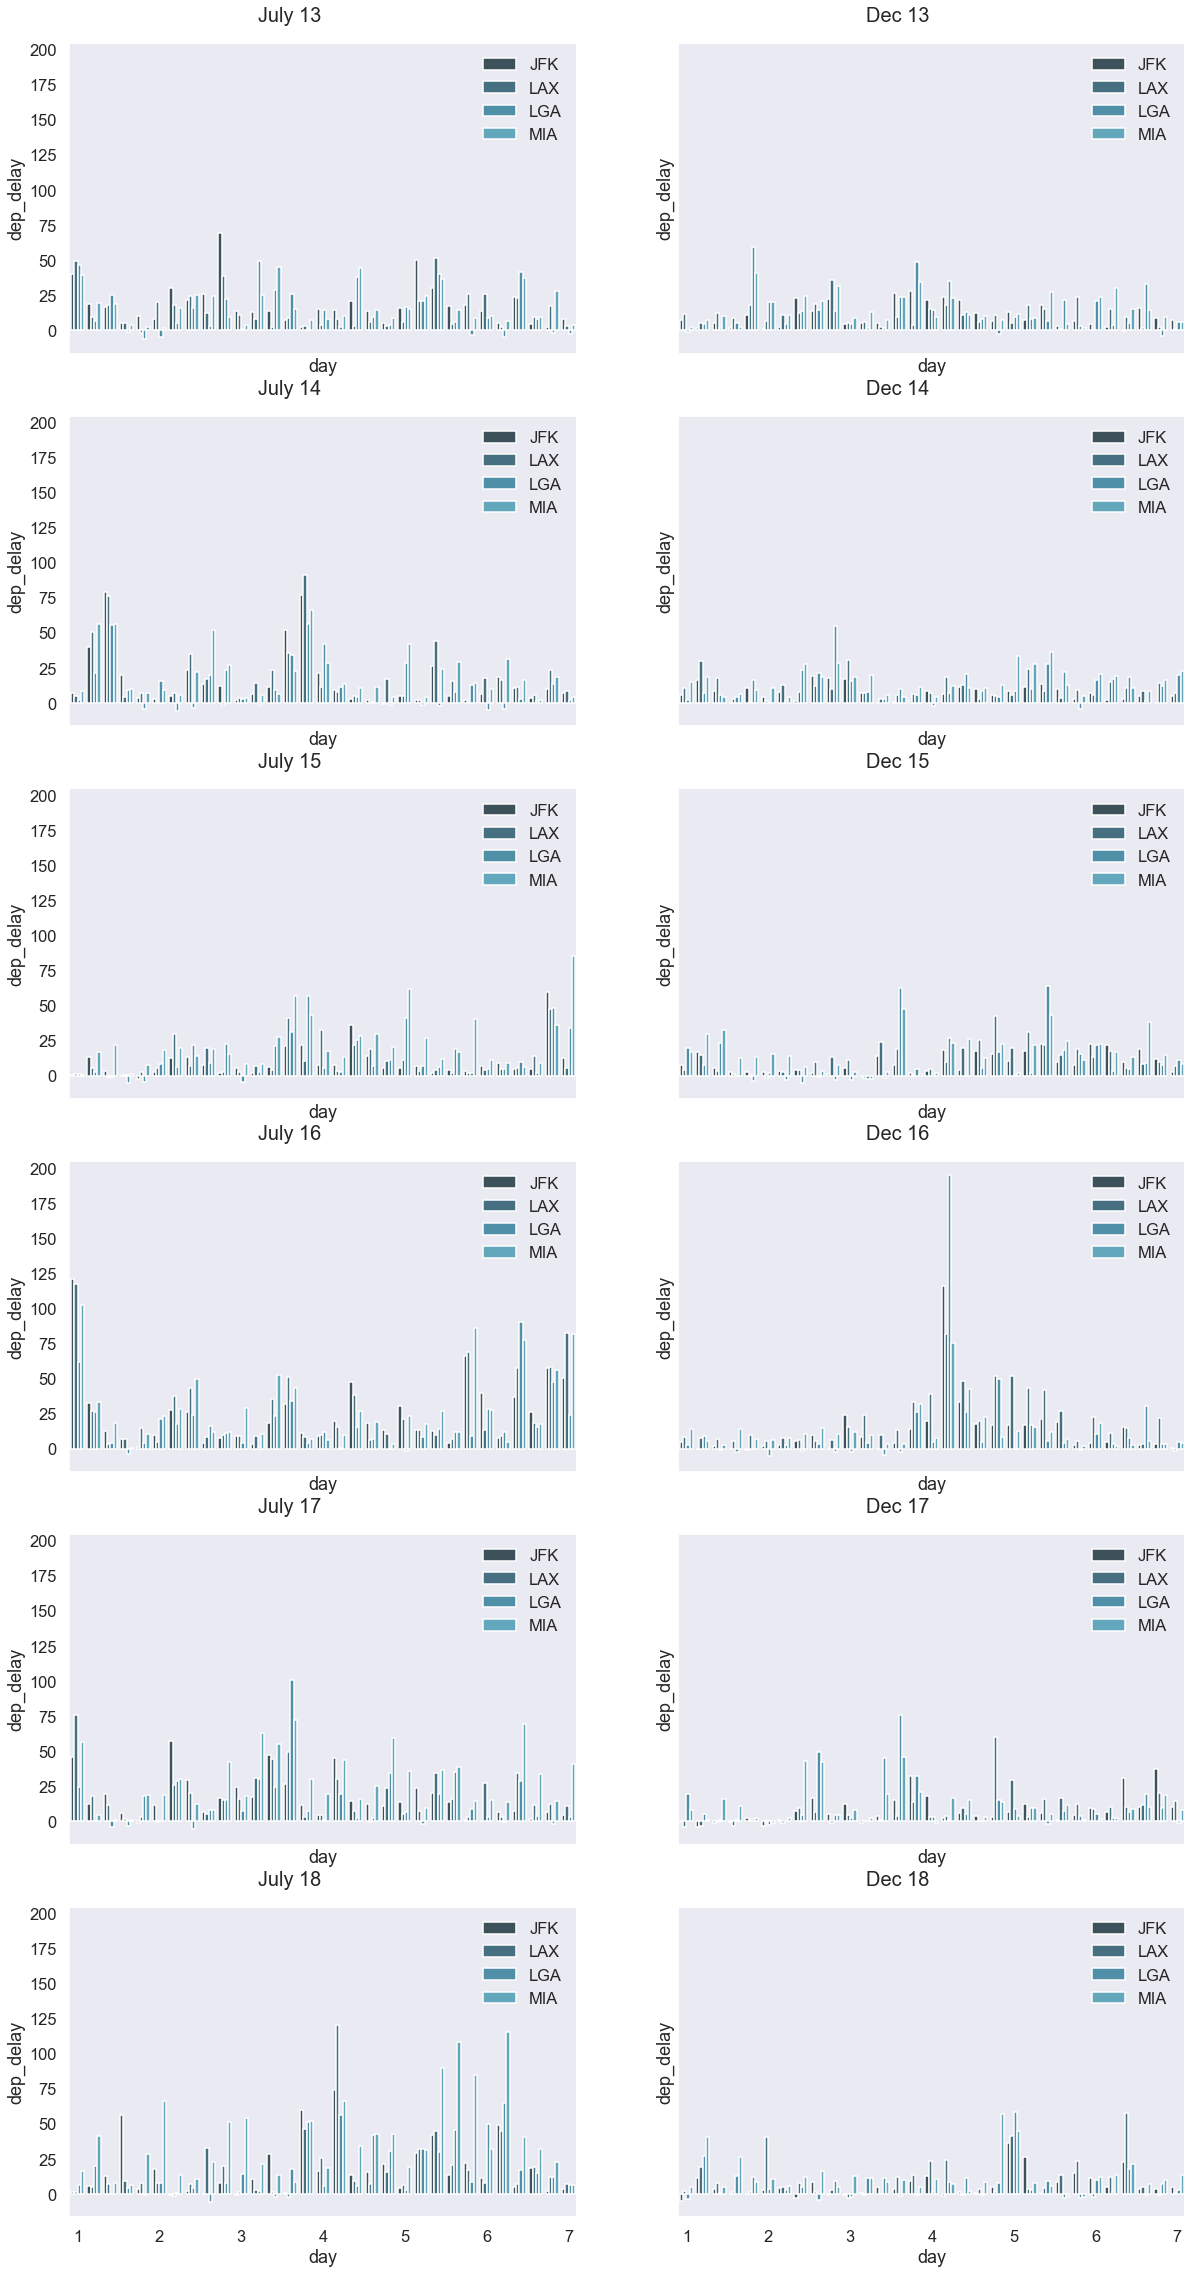

In [196]:
fig, ax = plt.subplots(6, 2, figsize=(20,40), sharex=False, sharey=True)

sns.set(style='dark', context='talk')
palette=sns.color_palette('GnBu_d')


jul13 = sns.barplot(july_13['day'], july_13['dep_delay'], hue=july_13['origin'], ax = ax[0][0], palette=palette)
dec13 = sns.barplot(dec_13['day'], dec_13['dep_delay'], hue=dec_13['origin'], ax=ax[0][1], palette=palette)
jul14 = sns.barplot(july_14['day'], july_14['dep_delay'], hue=july_14['origin'], ax=ax[1][0], palette=palette)
dec14 = sns.barplot(dec_14['day'], dec_14['dep_delay'], hue=dec_14['origin'], ax=ax[1][1], palette=palette)
jul15 = sns.barplot(july_15['day'], july_15['dep_delay'], hue=july_15['origin'], ax=ax[2][0], palette=palette)
dec15 = sns.barplot(dec_15['day'], dec_15['dep_delay'], hue=dec_15['origin'], ax=ax[2][1], palette=palette)
jul16 = sns.barplot(july_16['day'], july_16['dep_delay'], hue=july_16['origin'], ax=ax[3][0], palette=palette)
dec16 = sns.barplot(dec_16['day'], dec_16['dep_delay'], hue=dec_16['origin'], ax=ax[3][1], palette=palette)
jul17 = sns.barplot(july_17['day'], july_17['dep_delay'], hue=july_17['origin'], ax=ax[4][0], palette=palette)
dec17 = sns.barplot(dec_17['day'], dec_17['dep_delay'], hue=dec_17['origin'], ax=ax[4][1], palette=palette)
jul18 = sns.barplot(july_18['day'], july_18['dep_delay'], hue=july_18['origin'], ax=ax[5][0], palette=palette)
dec18 = sns.barplot(dec_18['day'], dec_18['dep_delay'], hue=dec_18['origin'], ax=ax[5][1], palette=palette)

jul13.legend(title='', frameon=False)
dec13.legend(title='', frameon=False)
jul14.legend(title='', frameon=False)
dec14.legend(title='', frameon=False)
jul15.legend(title='', frameon=False)
dec15.legend(title='', frameon=False)
jul16.legend(title='', frameon=False)
dec16.legend(title='', frameon=False)
jul17.legend(title='', frameon=False)
dec17.legend(title='', frameon=False)
jul18.legend(title='', frameon=False)
dec18.legend(title='', frameon=False)

jul18.set_xticks()


jul13.text(11, 220,'July 13', fontsize=20)
dec13.text(11, 220, 'Dec 13', fontsize=20)
jul14.text(11, 220, 'July 14', fontsize=20)
dec14.text(11, 220, 'Dec 14', fontsize=20)
jul15.text(11, 220, 'July 15', fontsize=20)
dec15.text(11, 220, 'Dec 15', fontsize=20)
jul16.text(11, 220, 'July 16', fontsize=20)
dec16.text(11, 220, 'Dec 16', fontsize=20)
jul17.text(11, 220, 'July 17', fontsize=20)
dec17.text(11, 220, 'Dec 17', fontsize=20)
jul18.text(11, 220, 'July 18', fontsize=20)
dec18.text(11, 220, 'Dec 18', fontsize=20);

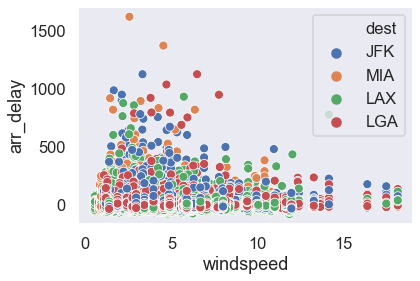

In [185]:
sns.scatterplot(flights_df['windspeed'], flights_df['arr_delay'], hue=flights_df['dest'])

In [198]:
cursor.execute("""SELECT FL.date, FL.origin, FL.origin_city, FL.dest, FL.dest_city, FL.dep_delay, FL.arr_delay, FL.cancelled, FL.air_time, WEA.city_name, WEA.max_temp, WEA.min_temp, WEA.cloud_cover, WEA.humidity, WEA.precip_intens, WEA.visibility, WEA.windspeed FROM FLIGHTS.FLIGHTS AS FL JOIN FLIGHTS.WEATHER AS WEA ON (FL.date = WEA.date AND FL.origin_city = WEA.city_name) GROUP BY FL.flight_id, FL.date, WEA.date""")
flights_data = cursor.fetchall()
flight_df = pd.DataFrame(flights_data)
flight_df.shape
field_names = [i[0] for i in cursor.description]
flight_df.columns = field_names

In [199]:
tick = []
for dial in flight_df['date']:
    tick.append(pd.datetime.strptime(dial, '%Y-%m-%d'))

flight_df['date_1'] = [x for x in tick]

In [200]:
dc_df = flight_df.groupby(by=['date_1', 'origin', ]).mean()
dc_df = dc_df.reset_index()
dc_df['day'] = pd.DatetimeIndex(dc_df['date_1']).day

In [201]:
for num in range(0, len(dc_df)):
    if num/124 == 1:
        july13 = dc_df.iloc[0:num]
    elif num/124 == 2:
        dec13 = dc_df.iloc[(num-124):num]
    elif num/124 == 3:
        july14 = dc_df.iloc[(num-124):num]
    elif num/124 == 4:
        dec14 = dc_df.iloc[(num-124):num]
    elif num/124 == 5:
        july15 = dc_df.iloc[(num-124):num]
    elif num/124 == 6:
        dec15 = dc_df.iloc[(num-124):num]
    elif num/124 == 7:
        july16 = dc_df.iloc[(num-124):num]
    elif num/124 == 8:
        dec16 = dc_df.iloc[(num-124):num]
    elif num/124 == 9:
        july17 = dc_df.iloc[(num-124):num]
    elif num/124 == 10:
        dec17 = dc_df.iloc[(num-124):num]
    elif num/124 == 11:
        july18 = dc_df.iloc[(num-124):num]  
    elif num/124 > 11:
        dec18 = dc_df.iloc[-124:]
    else:
        pass
    

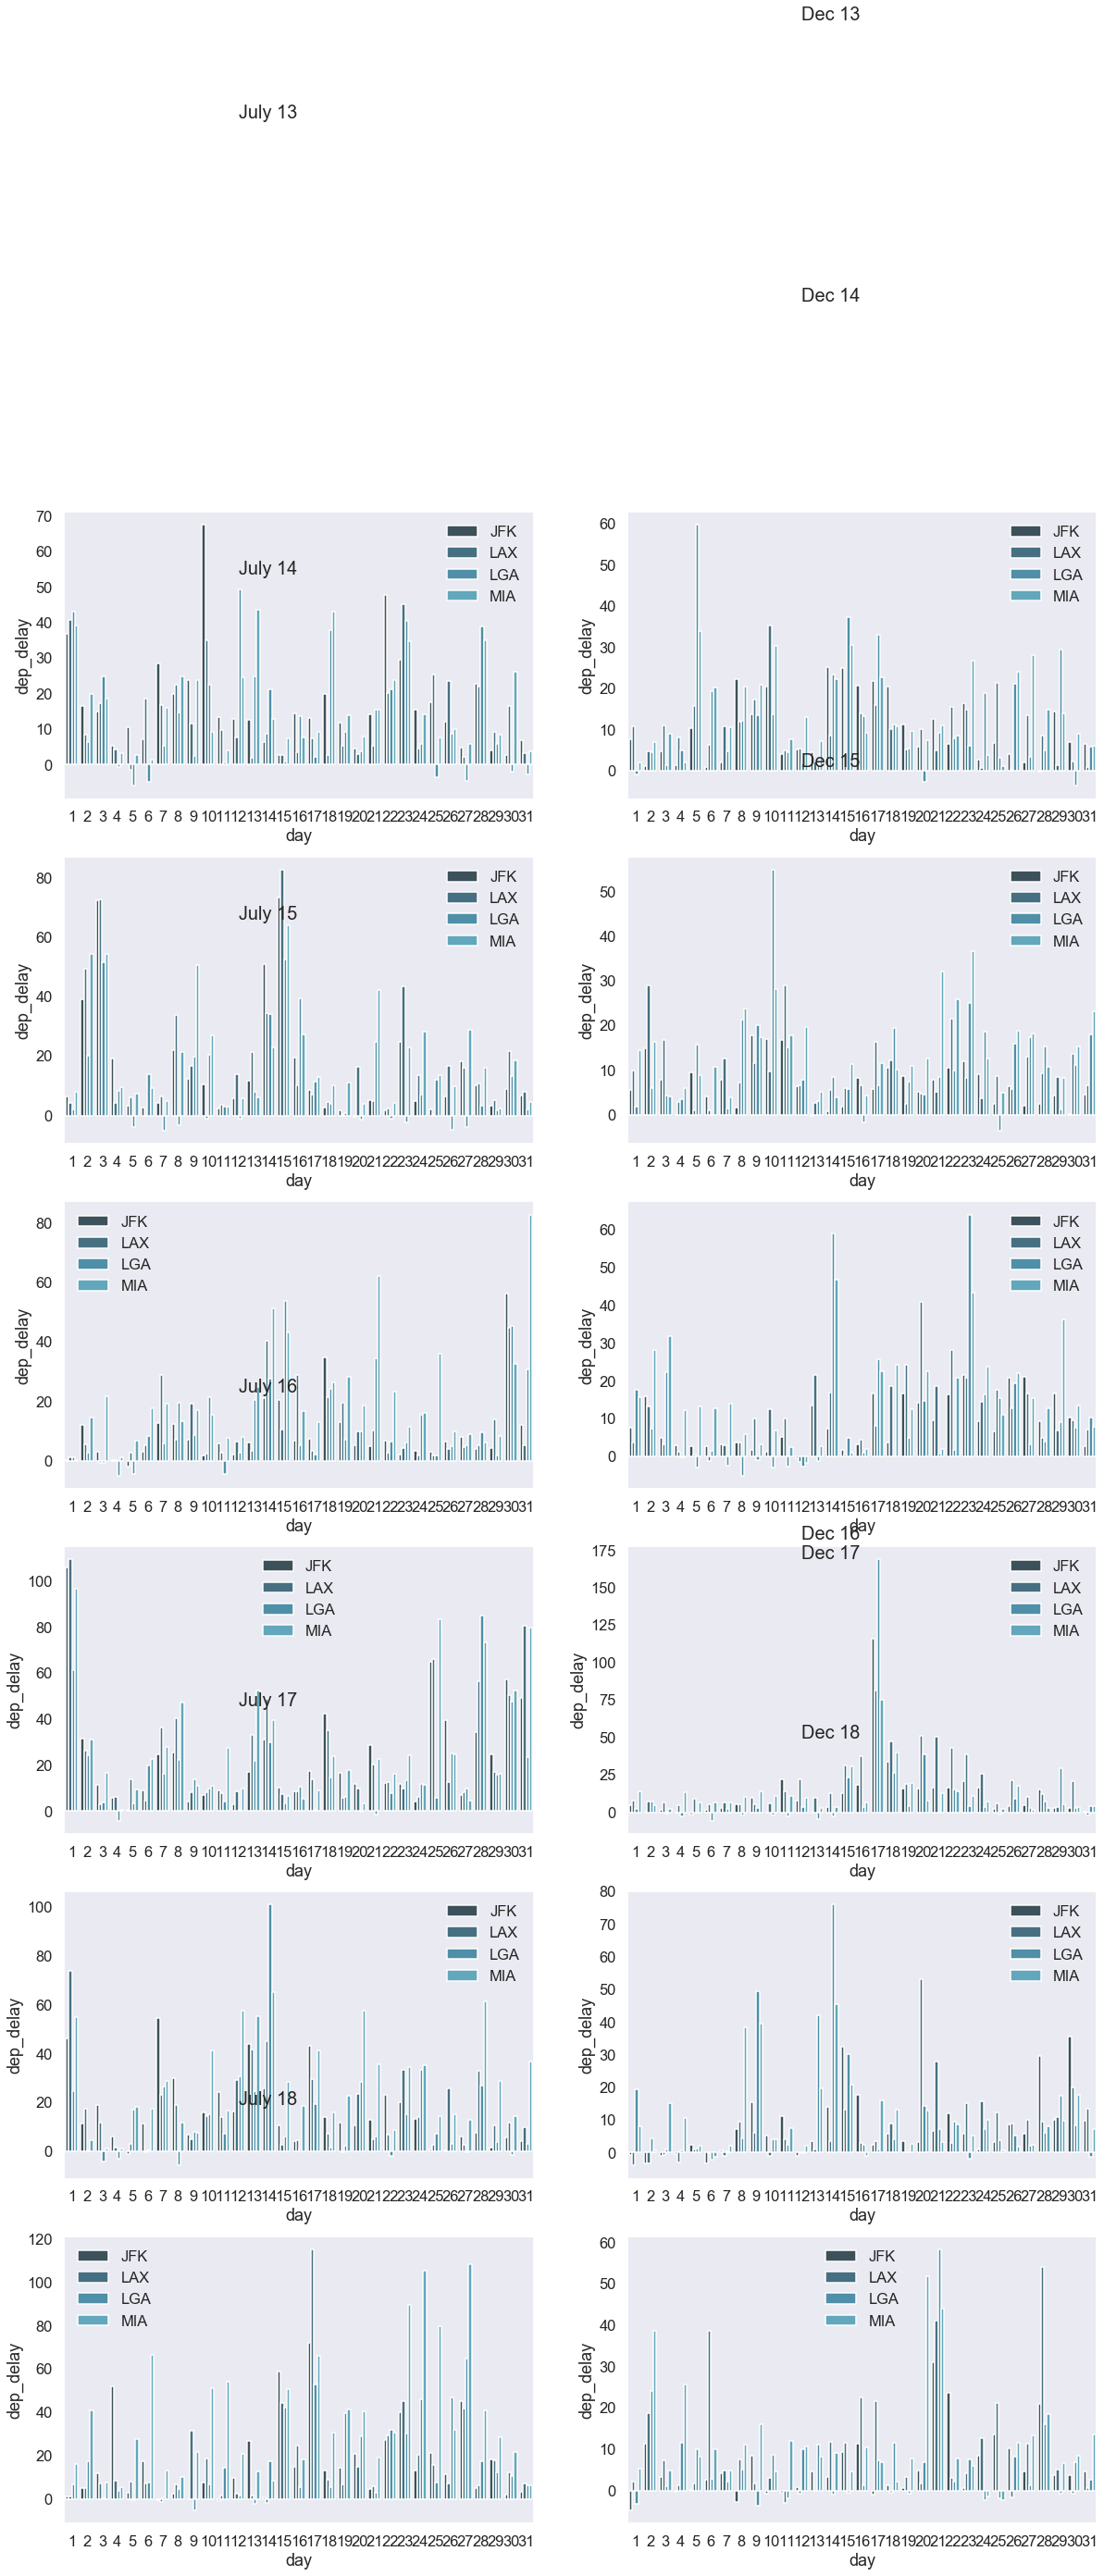

In [217]:
fig, ax = plt.subplots(6, 2, figsize=(20,40), sharex=True, sharey=True)

sns.set(style='dark', context='talk')
palette=sns.color_palette('GnBu_d')


jul13_ = sns.barplot(july13['day'], july13['dep_delay'], hue=july13['origin'], ax = ax[0][0], palette=palette)
dec13_ = sns.barplot(dec13['day'], dec13['dep_delay'], hue=dec13['origin'], ax=ax[0][1], palette=palette)
jul14_ = sns.barplot(july14['day'], july14['dep_delay'], hue=july14['origin'], ax=ax[1][0], palette=palette)
dec14_ = sns.barplot(dec14['day'], dec14['dep_delay'], hue=dec14['origin'], ax=ax[1][1], palette=palette)
jul15_ = sns.barplot(july15['day'], july15['dep_delay'], hue=july15['origin'], ax=ax[2][0], palette=palette)
dec15_ = sns.barplot(dec15['day'], dec15['dep_delay'], hue=dec15['origin'], ax=ax[2][1], palette=palette)
jul16_ = sns.barplot(july16['day'], july16['dep_delay'], hue=july16['origin'], ax=ax[3][0], palette=palette)
dec16_ = sns.barplot(dec16['day'], dec16['dep_delay'], hue=dec16['origin'], ax=ax[3][1], palette=palette)
jul17_ = sns.barplot(july17['day'], july17['dep_delay'], hue=july17['origin'], ax=ax[4][0], palette=palette)
dec17_ = sns.barplot(dec17['day'], dec17['dep_delay'], hue=dec17['origin'], ax=ax[4][1], palette=palette)
jul18_ = sns.barplot(july18['day'], july18['dep_delay'], hue=july18['origin'], ax=ax[5][0], palette=palette)
dec18_ = sns.barplot(dec18['day'], dec18['dep_delay'], hue=dec18['origin'], ax=ax[5][1], palette=palette)

jul13_.legend(title='', frameon=False)
dec13_.legend(title='', frameon=False)
jul14_.legend(title='', frameon=False)
dec14_.legend(title='', frameon=False)
jul15_.legend(title='', frameon=False)
dec15_.legend(title='', frameon=False)
jul16_.legend(title='', frameon=False)
dec16_.legend(title='', frameon=False)
jul17_.legend(title='', frameon=False)
dec17_.legend(title='', frameon=False)
jul18_.legend(title='', frameon=False)
dec18_.legend(title='', frameon=False)



jul13_.text(11, 182,'July 13', fontsize=20)
dec13_.text(11, 182, 'Dec 13', fontsize=20)
jul14_.text(11, 182, 'July 14', fontsize=20)
dec14_.text(11, 182, 'Dec 14', fontsize=20)
jul15_.text(11, 182, 'July 15', fontsize=20)
dec15_.text(11, 182, 'Dec 15', fontsize=20)
jul16_.text(11, 182, 'July 16', fontsize=20)
dec16_.text(11, 182, 'Dec 16', fontsize=20)
jul17_.text(11, 182, 'July 17', fontsize=20)
dec17_.text(11, 182, 'Dec 17', fontsize=20)
jul18_.text(11, 182, 'July 18', fontsize=20)
dec18_.text(11, 182, 'Dec 18', fontsize=20);

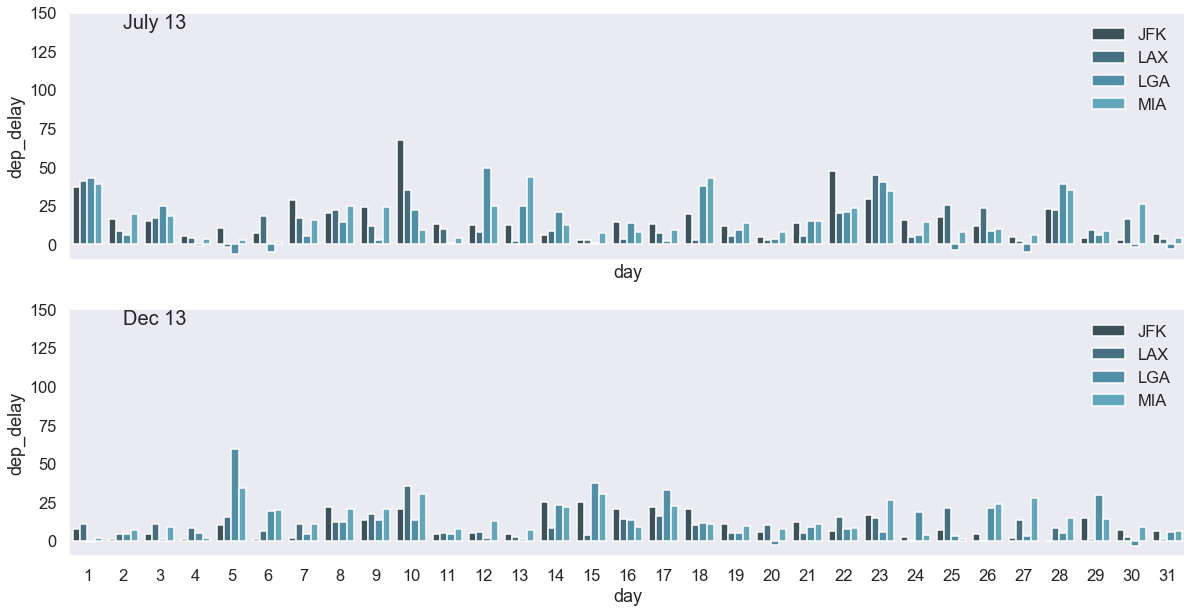

In [264]:
fig, ax = plt.subplots(2, 1, figsize=(20,10), sharex=True, sharey=True)

sns.set(style='dark', context='talk')
palette=sns.color_palette('GnBu_d')


jul13_ = sns.barplot(july13['day'], july13['dep_delay'], hue=july13['origin'], ax = ax[0], palette=palette)
dec13_ = sns.barplot(dec13['day'], dec13['dep_delay'], hue=dec13['origin'], ax=ax[1], palette=palette)

jul13_.set_ybound(lower=-10, upper=150)

jul13_.legend(title='', frameon=False)
dec13_.legend(title='', frameon=False)



jul13_.text(1, 140,'July 13', fontsize=20)
dec13_.text(1, 140, 'Dec 13', fontsize=20);

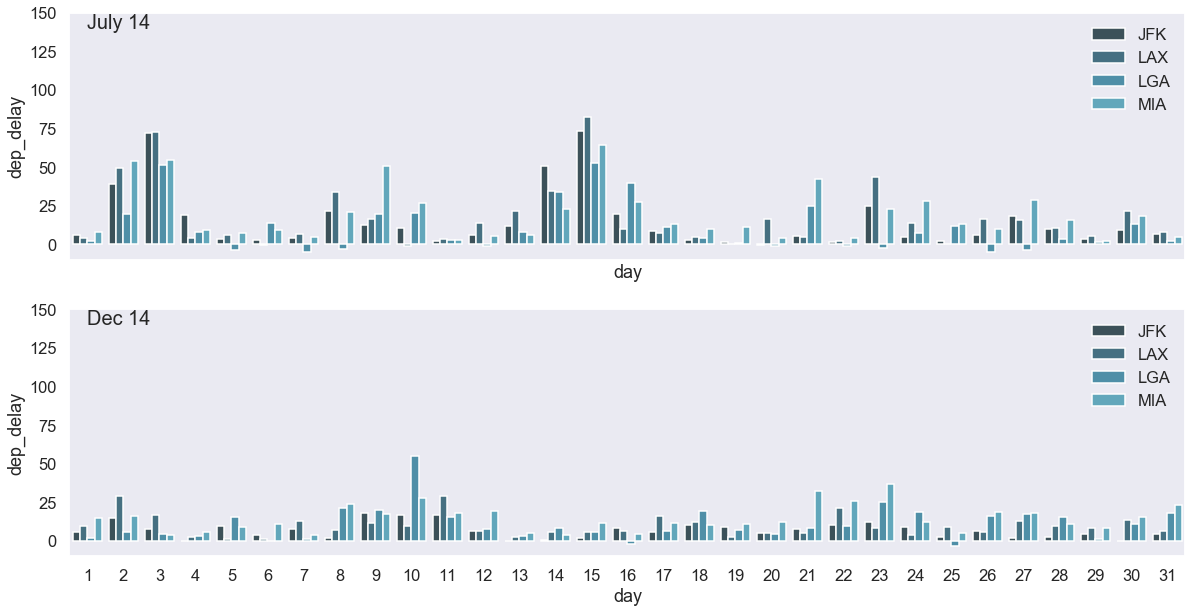

In [265]:
fig, ax = plt.subplots(2, 1, figsize=(20,10), sharex=True, sharey=True)

sns.set(style='dark', context='talk')
palette=sns.color_palette('GnBu_d')



jul14_ = sns.barplot(july14['day'], july14['dep_delay'], hue=july14['origin'], ax=ax[0], palette=palette)
dec14_ = sns.barplot(dec14['day'], dec14['dep_delay'], hue=dec14['origin'], ax=ax[1], palette=palette)

jul14_.set_ybound(lower=-10, upper=150)

jul14_.legend(title='', frameon=False)
dec14_.legend(title='', frameon=False)



jul14_.text(0, 140, 'July 14', fontsize=20)
dec14_.text(0, 140, 'Dec 14', fontsize=20);

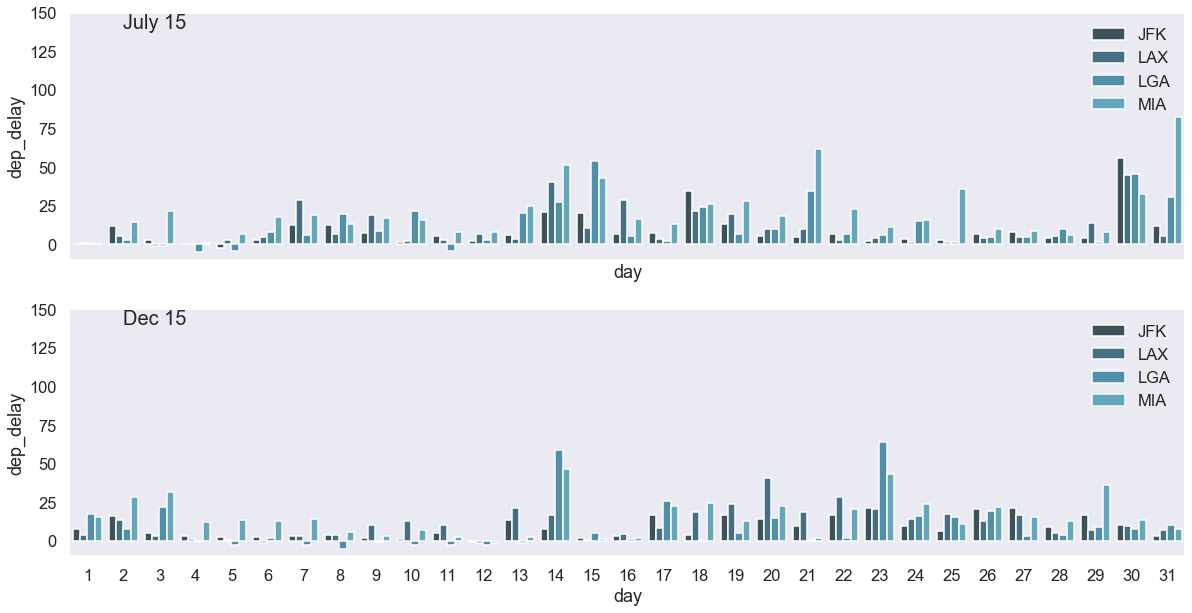

In [266]:
fig, ax = plt.subplots(2, 1, figsize=(20,10), sharex=True, sharey=True)

sns.set(style='dark', context='talk')
palette=sns.color_palette('GnBu_d')



jul15_ = sns.barplot(july15['day'], july15['dep_delay'], hue=july15['origin'], ax=ax[0], palette=palette)
dec15_ = sns.barplot(dec15['day'], dec15['dep_delay'], hue=dec15['origin'], ax=ax[1], palette=palette)

jul15_.set_ybound(lower=-10, upper=150)

jul15_.legend(title='', frameon=False, loc=1)
dec15_.legend(title='', frameon=False)



jul15_.text(1, 140, 'July 15', fontsize=20)
dec15_.text(1, 140, 'Dec 15', fontsize=20);

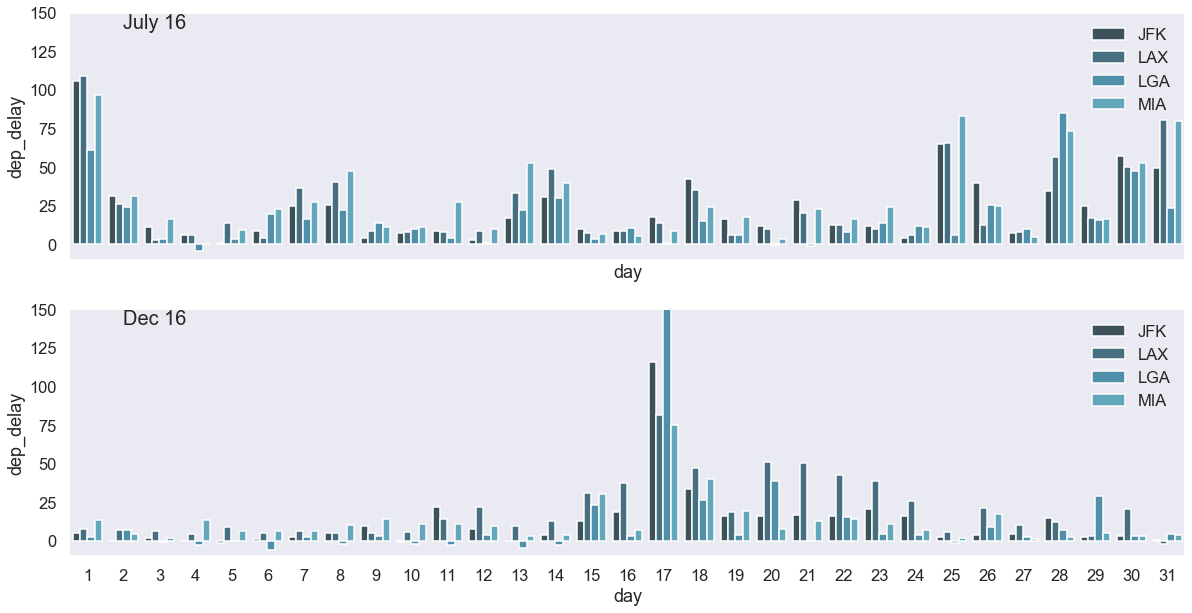

In [267]:
fig, ax = plt.subplots(2, 1, figsize=(20,10), sharex=True, sharey=True)

sns.set(style='dark', context='talk')
palette=sns.color_palette('GnBu_d')



jul16_ = sns.barplot(july16['day'], july16['dep_delay'], hue=july16['origin'], ax=ax[0], palette=palette)
dec16_ = sns.barplot(dec16['day'], dec16['dep_delay'], hue=dec16['origin'], ax=ax[1], palette=palette)

jul16_.set_ybound(lower=-10, upper=150)

jul16_.legend(title='', frameon=False)
dec16_.legend(title='', frameon=False)



jul16_.text(1, 140, 'July 16', fontsize=20)
dec16_.text(1, 140, 'Dec 16', fontsize=20);

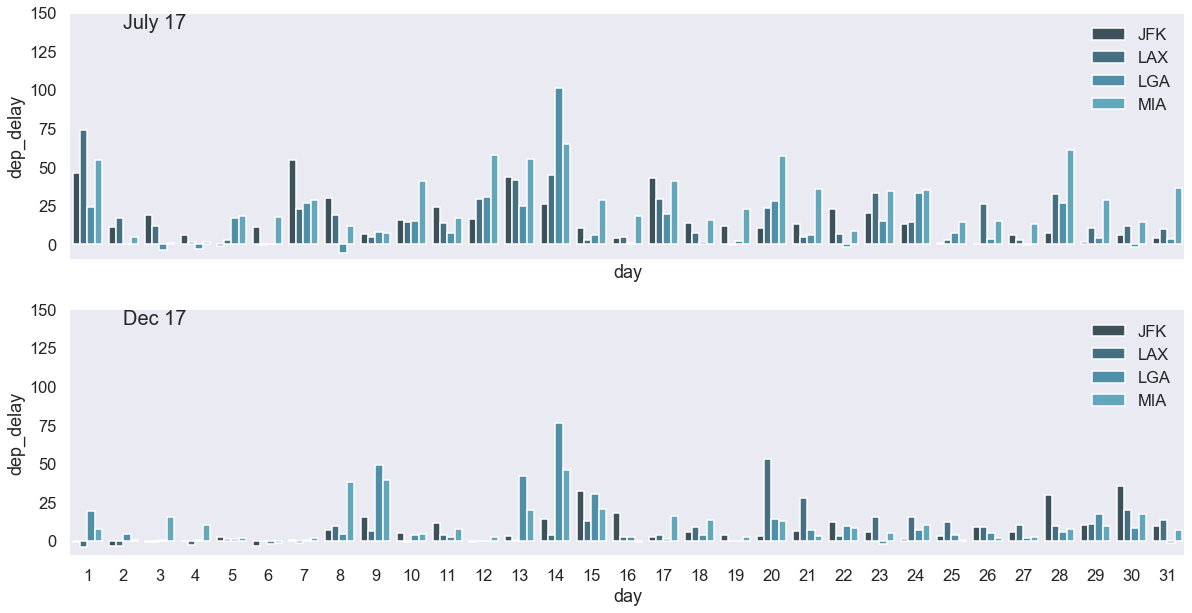

In [268]:
fig, ax = plt.subplots(2, 1, figsize=(20,10), sharex=True, sharey=True)

sns.set(style='dark', context='talk')
palette=sns.color_palette('GnBu_d')



jul17_ = sns.barplot(july17['day'], july17['dep_delay'], hue=july17['origin'], ax=ax[0], palette=palette)
dec17_ = sns.barplot(dec17['day'], dec17['dep_delay'], hue=dec17['origin'], ax=ax[1], palette=palette)

jul17_.set_ybound(lower=-10, upper=150)

jul17_.legend(title='', frameon=False)
dec17_.legend(title='', frameon=False)



jul17_.text(1, 140, 'July 17', fontsize=20)
dec17_.text(1, 140, 'Dec 17', fontsize=20);

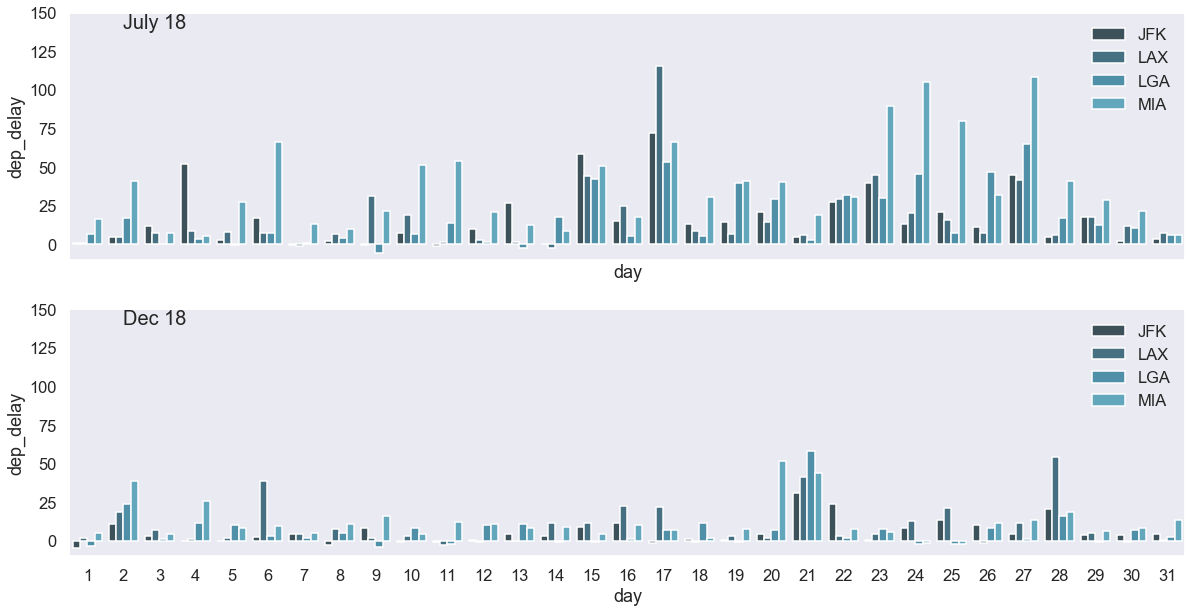

In [270]:
fig, ax = plt.subplots(2, 1, figsize=(20,10), sharex=True, sharey=True)

sns.set(style='dark', context='talk')
palette=sns.color_palette('GnBu_d')



jul18_ = sns.barplot(july18['day'], july18['dep_delay'], hue=july18['origin'], ax=ax[0], palette=palette)
dec18_ = sns.barplot(dec18['day'], dec18['dep_delay'], hue=dec18['origin'], ax=ax[1], palette=palette)

jul18_.set_ybound(lower=-10, upper=150)

jul18_.legend(title='', frameon=False)
dec18_.legend(title='', frameon=False)



jul18_.text(1, 140, 'July 18', fontsize=20)
dec18_.text(1, 140, 'Dec 18', fontsize=20);

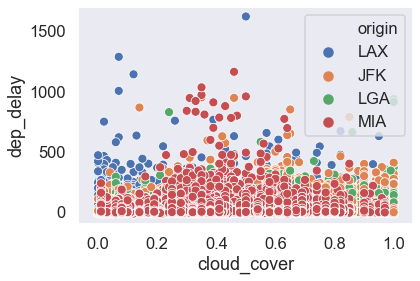

In [215]:
sns.scatterplot(flight_df['cloud_cover'], flight_df['dep_delay'], hue=flight_df['origin']);